# Plotnine import, theme, and example plots

In [1]:
# import plotnine
from plotnine import \
    ggplot, aes, theme, themes, element_blank, element_line, element_text, mapping, \
    geom_point, geom_jitter, geom_line, geom_bar, geom_boxplot, geom_violin, geom_histogram, \
    ggtitle, xlab, ylab, geom_vline, geom_hline, \
    scale_x_discrete, scale_y_discrete, scale_x_continuous, scale_y_continuous, scale_color_discrete, \
    xlim, ylim
from plotnine.options import figure_size

# https://github.com/ponnhide/patchworklib
import patchworklib as pw

<Figure size 72x72 with 0 Axes>

In [14]:
#import plotnine as p9
#p9.__version__ = '0.9.0'

In [2]:
# plotnine theme

def theme_tufte_func(base_size=19, base_family="sans", rotate=True, figure_size=None):
    ''' Plotnine plotting theme. '''
    thm = themes.theme_bw(base_size=base_size, base_family = base_family) + \
        theme(
            legend_background = element_blank(),
            legend_key = element_blank(),
            panel_background = element_blank(),
            panel_border = element_blank(),
            strip_background = element_blank(),
            plot_background = element_blank(),
            panel_grid = element_blank(),
            axis_line = element_line(colour = "black", size = 1),
            axis_text_y = element_text(colour = "black")
        )

    if rotate:
        thm += theme(axis_text_x=element_text(rotation=45, hjust=1))
    if figure_size is not None:
        thm += theme(figure_size=figure_size)

    return thm


In [18]:
# Generate example data
import numpy as np
import pandas as pd

mu, sigma = 0, 0.1
x = np.random.normal(mu, sigma, 1000)
y = np.random.normal(mu+0.2, sigma, 1000)
z = np.random.chisquare(1, 1000)

data = pd.DataFrame(zip(x,y,z), columns=('x','y','z'))
data['class'] = ['a','b','c','d'] * (1000//4)
data


,x,y,z,class
0,0.189703,0.128519,0.166764,a
1,-0.175376,0.275200,0.031490,b
2,0.102877,0.163677,0.297949,c
3,0.078298,0.091323,0.362378,d
4,-0.002426,0.218919,0.500781,a
...,...,...,...,...
995,-0.123328,0.121637,0.147398,d
996,-0.123924,0.213389,3.750585,a
997,-0.145467,0.088938,1.276247,b
998,0.031101,0.128573,1.802730,c


In [15]:
# Example scatter plots
p1 = (
    ggplot(data, aes(x='x', y='y', color='class')) +
    geom_point(stat="identity", alpha=0.8) +
    ggtitle("Title") +
    xlab("x-lab") +
    ylab("y-lab") +
    #xlim(-0.5, 0.5) +
    #ylim(-0.5, 0.5) +
    theme_tufte_func(base_size=20, rotate=False)
)

p2 = (
    ggplot(data, aes(x='x', y='z', color='class')) +
    geom_point(stat="identity", alpha=0.8) +
    ggtitle("Title") +
    xlab("x-lab") +
    ylab("y-lab") +
    #xlim(-0.5, 0.5) +
    #ylim(-0.5, 0.5) +
    theme_tufte_func(base_size=20, rotate=False)
)


# Example histograms
p3 = (
    ggplot(data, aes(x='x')) +
    geom_histogram(binwidth=0.05) +  # or use: bins=10
    ggtitle("Title") +
    xlab("x-lab") +
    ylab("Freq") +
    theme_tufte_func(base_size=20, rotate=False)
)

p4 = (
    ggplot(data, aes(x='z')) +
    geom_histogram(binwidth=0.05) +  # or use: bins=10
    ggtitle("Title") +
    xlab("x-lab") +
    ylab("Freq") +
    theme_tufte_func(base_size=20, rotate=False)
)



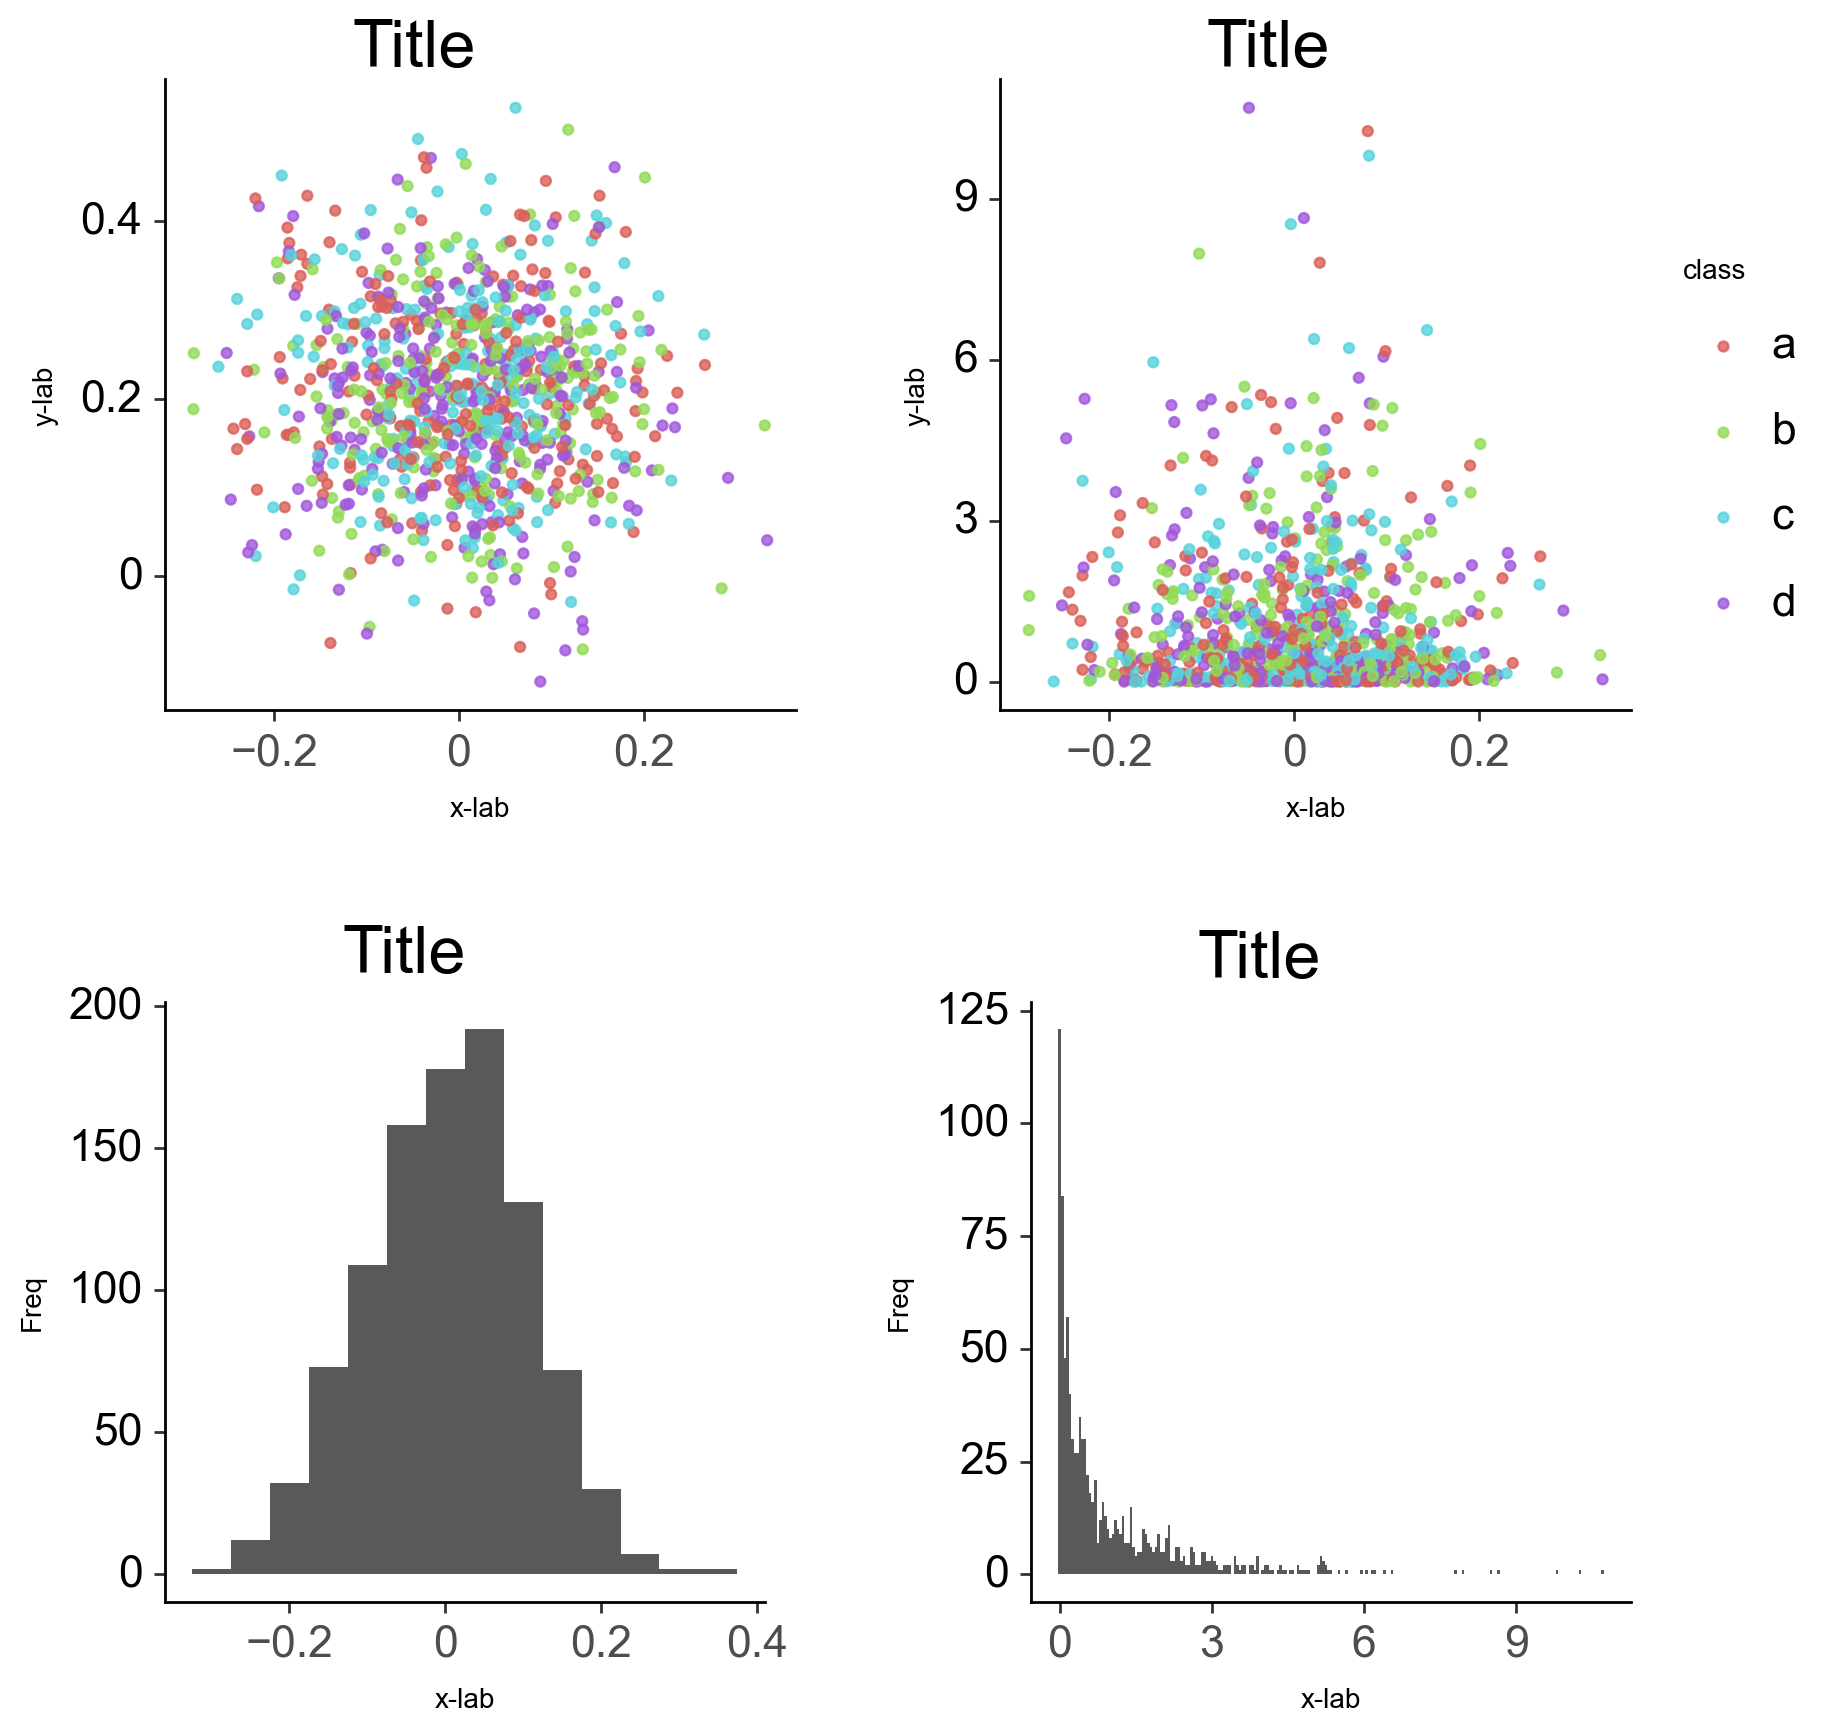

In [16]:
p1_no_legend = (p1 + scale_color_discrete(guide=False))

fig_lw = 3
pw1 = pw.load_ggplot(p1_no_legend, figsize=(fig_lw,fig_lw))
pw2 = pw.load_ggplot(p2, figsize=(fig_lw,fig_lw))
pw3 = pw.load_ggplot(p3, figsize=(fig_lw,fig_lw))
pw4 = pw.load_ggplot(p4, figsize=(fig_lw,fig_lw))

pw_combine = ((pw1|pw2) / (pw3|pw4))
pw_combine